# Kernel Sparsity Config Creator


## Env Setup

In [1]:
%matplotlib inline

import sys
import os

if 'WORKBOOK_DIR' not in globals():
    WORKBOOK_DIR = os.getcwd()

# Adding the path to the parent directory so that neuralmagicRecal and notebookwidgets will be available
# If this step does not work, then the path will need to be added manually
package_path = os.path.abspath(os.path.join(os.path.expanduser(os.getcwd()), os.pardir))
sys.path.extend([package_path])

print('Python %s on %s' % (sys.version, sys.platform))
print('Workbook dir: {}'.format(WORKBOOK_DIR))
print('Added current package path to sys.path: {}'.format(package_path))
print('Be sure to install from requirements.txt and pytorch separately')

Python 3.6.8 (default, Oct  7 2019, 12:59:55) 
[GCC 8.3.0] on linux
Workbook dir: /home/mark/neuralmagic/Shared/neuralmagicrecal-pytorch/notebooks
Added current package path to sys.path: /home/mark/neuralmagic/Shared/neuralmagicrecal-pytorch
Be sure to install from requirements.txt and pytorch separately


## Model Setup

In [2]:
import torch
import torchvision.models as models

# replace the next line with the desired model
model = models.resnet50(pretrained=True)

print('{} model created'.format(model.__class__.__name__))


ResNet model created


## Sensitivity Analysis

### Equation Approximation

Sensitivity analysis based on different equation approximations based off of the network shape and params.
Change the `sens.vs_kernels` to the desired approximation.
Available approximations: `er, erk, vs_er, vs_erk, vs_kernels`

The correct number of inputs and dimensions (sample_input variable) needs to be filled in for the model.
Change the `sample_input = ` to the proper dimensions.
Default is for a typical imagenet input: 3, 224, 224

running approximated sensitivity analysis


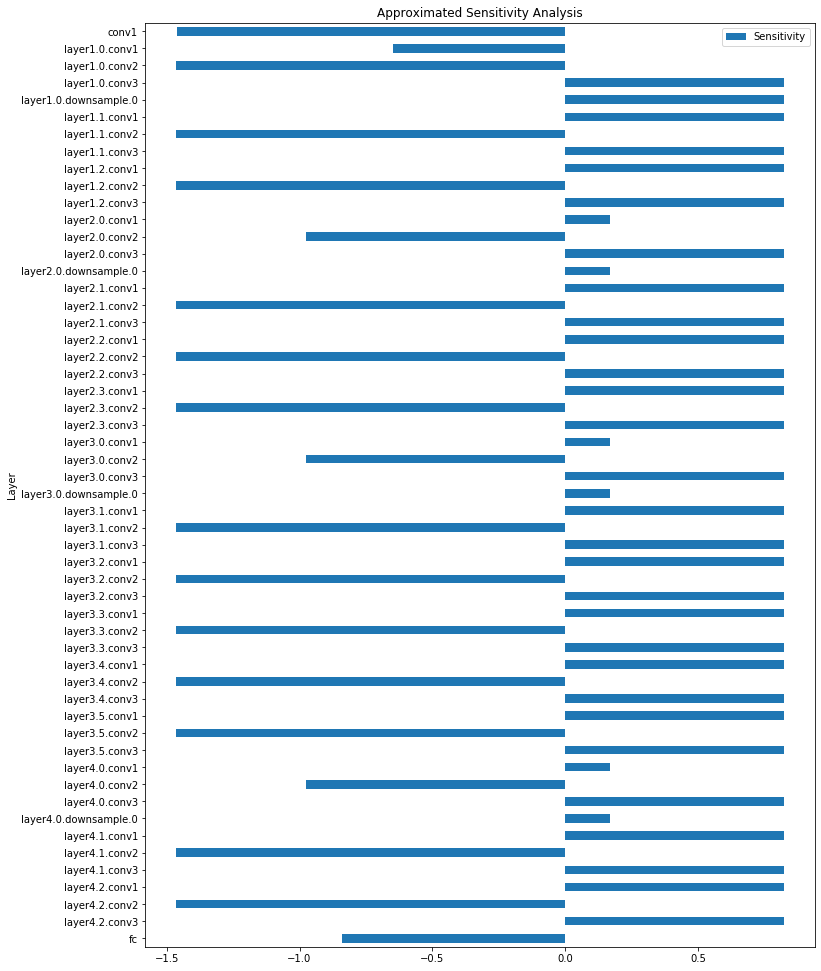

completed approximated sensitivity analysis


In [10]:
from neuralmagicRecal import approx_sensitivity_analysis, plot_sensitivities

print('running approximated sensitivity analysis')

# Change the sample_input below to the proper dimensions
sample_input = torch.randn(1, 3, 224, 224)
layer_sensitivities = approx_sensitivity_analysis(model, sample_input)

# Change the sensitivity approximation below to the desired one
sens_vals = [(sens.layer_desc.name, sens.vs_kernels) for sens in layer_sensitivities]
plot_sensitivities(sens_vals, title='Approximated Sensitivity Analysis')

print('completed approximated sensitivity analysis')


### Static Approximation


In [ ]:
from neuralmagicRecal import approx_sensitivity_analysis, plot_sensitivities

print('running approximated sensitivity analysis')

# Change the sample_input below to the proper dimensions
sample_input = torch.randn(1, 3, 224, 224)
layer_sensitivities = approx_sensitivity_analysis(model, sample_input)

# Change the sensitivity approximation below to the desired one
sens_vals = [(sens.layer_desc.name, sens.vs_erk) for sens in layer_sensitivities]
plot_sensitivities(sens_vals, title='Approximated Sensitivity Analysis')

print('completed approximated sensitivity analysis')


## Performance Analysis